<a href="https://colab.research.google.com/github/Peerada-Sukharom/data-analysis-portfolio/blob/main/StudentAndTeacherinRoiEt_PostCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Education Landscape of Roi Et Province After COVID-19 and prediction**
The goal of this project is to explores how the number of teachers and students in Roi Et province, Thailand has changed in the years following the COVID-19 pandemic. The analysis is based on educational statistics collected between B.E. 2564–2567 (which corresponds to A.D. 2021–2024 — as the Buddhist Era (B.E.) calendar used in Thailand is 543 years ahead of the Common Era (C.E.) calendar).
To identify future trends, this project applies a time series forecasting approach using Linear Regression and the Exponential Smoothing model to helps estimate the number of teachers and students in upcoming years based on past data patterns.

*Note: All datasets and figures in this notebook remain in the original Buddhist calendar format (B.E.) without conversion to C.E.*



**Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_stu_67 = pd.read_csv("/content/drive/My Drive/csv_portfolio/roi_et_stu_2567_utf8.csv", encoding='utf-8')
df_stu_67.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,YearEdu,SchoolCode,SchoolName,SubDistrictNameThai,DistrictNameThai,ProvinceNameTH,DepartmentNameThai,AreaName,Sum_MaleStu,Sum_FemaleStu,Sum_MaleTeacher,Sum_FemaleTeacher,Latitude,Longitude
0,2567,1045450804,ร้อยเอ็ดวิทยาลัย,ในเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,2206.0,1132.0,2.0,2.0,16.052152,103.656762
1,2567,1045450805,สตรีศึกษา,ในเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,442.0,3266.0,NaN,1.0,16.048916,103.654896
2,2567,1045450807,ขัติยะวงษา,เหนือเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,559.0,529.0,20.0,41.0,16.071751,103.654997
3,2567,1045450806,เตรียมอุดมศึกษาพัฒนาการ ร้อยเอ็ด,หนองแวง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,352.0,351.0,25.0,33.0,16.082690,103.587461
4,2567,1045450809,จันทรุเบกษาอนุสรณ์,เกษตรวิสัย,เกษตรวิสัย,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,992.0,1155.0,44.0,84.0,15.655458,103.597637


**Data Preprocessing**
1. Exploring Data - Inspect the dataset structure

2. Cleaning Data - Handle missing values by removing incomplete records.

3. Repeat for Each File - Apply the same cleaning and aggregation process to every CSV file, as each file corresponds to a different academic year.

4. Merging Yearly Datasets - Concatenate all cleaned annual datasets into a single DataFrame.

In [ ]:
df_stu_67.columns.tolist()

['YearEdu',
 'SchoolCode',
 'SchoolName',
 'SubDistrictNameThai',
 'DistrictNameThai',
 'ProvinceNameTH',
 'DepartmentNameThai',
 'AreaName',
 'Sum_MaleStu',
 'Sum_FemaleStu',
 'Sum_MaleTeacher',
 'Sum_FemaleTeacher',
 'Latitude',
 'Longitude']

In [ ]:
df_stu_67.isnull().sum()

,0
YearEdu,0
SchoolCode,0
SchoolName,0
SubDistrictNameThai,0
DistrictNameThai,0
ProvinceNameTH,0
DepartmentNameThai,0
AreaName,649
Sum_MaleStu,25
Sum_FemaleStu,42


In [ ]:
df_stu_67 = df_stu_67.dropna(axis=0)

In [ ]:
df_stu_67.isnull().sum()

,0
YearEdu,0
SchoolCode,0
SchoolName,0
SubDistrictNameThai,0
DistrictNameThai,0
ProvinceNameTH,0
DepartmentNameThai,0
AreaName,0
Sum_MaleStu,0
Sum_FemaleStu,0


In [ ]:
cols_to_sum = ['Sum_MaleStu', 'Sum_FemaleStu']
df_stu_67['Total_SumStu'] = df_stu_67[cols_to_sum].sum(axis=1)

In [ ]:
df_stu_67.head(7)

,YearEdu,SchoolCode,SchoolName,SubDistrictNameThai,DistrictNameThai,ProvinceNameTH,DepartmentNameThai,AreaName,Sum_MaleStu,Sum_FemaleStu,Sum_MaleTeacher,Sum_FemaleTeacher,Latitude,Longitude,Total_SumStu
0,2567,1045450804,ร้อยเอ็ดวิทยาลัย,ในเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,2206.0,1132.0,2.0,2.0,16.052152,103.656762,3338.0
2,2567,1045450807,ขัติยะวงษา,เหนือเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,559.0,529.0,20.0,41.0,16.071751,103.654997,1088.0
3,2567,1045450806,เตรียมอุดมศึกษาพัฒนาการ ร้อยเอ็ด,หนองแวง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,352.0,351.0,25.0,33.0,16.082690,103.587461,703.0
4,2567,1045450809,จันทรุเบกษาอนุสรณ์,เกษตรวิสัย,เกษตรวิสัย,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,992.0,1155.0,44.0,84.0,15.655458,103.597637,2147.0
5,2567,1045450814,ปทุมรัตต์พิทยาคม,บัวแดง,ปทุมรัตต์,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,759.0,1055.0,56.0,66.0,15.631843,103.331626,1814.0
6,2567,1045450818,ดู่น้อยประชาสรรค์,อีง่อง,จตุรพักตรพิมาน,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,51.0,58.0,8.0,11.0,15.773487,103.490684,109.0
7,2567,1045450822,ศรีธวัชวิทยาลัย,นิเวศน์,ธวัชบุรี,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,35.0,84.0,8.0,10.0,16.036914,103.738987,119.0


In [ ]:
cols_to_sum = ['Sum_MaleTeacher', 'Sum_FemaleTeacher']
df_stu_67['Total_SumTea'] = df_stu_67[cols_to_sum].sum(axis=1)

In [ ]:
df_stu_67.head(7)

,YearEdu,SchoolCode,SchoolName,SubDistrictNameThai,DistrictNameThai,ProvinceNameTH,DepartmentNameThai,AreaName,Sum_MaleStu,Sum_FemaleStu,Sum_MaleTeacher,Sum_FemaleTeacher,Latitude,Longitude,Total_SumStu,Total_SumTea
0,2567,1045450804,ร้อยเอ็ดวิทยาลัย,ในเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,2206.0,1132.0,2.0,2.0,16.052152,103.656762,3338.0,4.0
2,2567,1045450807,ขัติยะวงษา,เหนือเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,559.0,529.0,20.0,41.0,16.071751,103.654997,1088.0,61.0
3,2567,1045450806,เตรียมอุดมศึกษาพัฒนาการ ร้อยเอ็ด,หนองแวง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,352.0,351.0,25.0,33.0,16.082690,103.587461,703.0,58.0
4,2567,1045450809,จันทรุเบกษาอนุสรณ์,เกษตรวิสัย,เกษตรวิสัย,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,992.0,1155.0,44.0,84.0,15.655458,103.597637,2147.0,128.0
5,2567,1045450814,ปทุมรัตต์พิทยาคม,บัวแดง,ปทุมรัตต์,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,759.0,1055.0,56.0,66.0,15.631843,103.331626,1814.0,122.0
6,2567,1045450818,ดู่น้อยประชาสรรค์,อีง่อง,จตุรพักตรพิมาน,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,51.0,58.0,8.0,11.0,15.773487,103.490684,109.0,19.0
7,2567,1045450822,ศรีธวัชวิทยาลัย,นิเวศน์,ธวัชบุรี,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,35.0,84.0,8.0,10.0,16.036914,103.738987,119.0,18.0


In [ ]:
df_stu_67 = df_stu_67.drop(columns=['Sum_MaleStu', 'Sum_FemaleStu', 'Sum_MaleTeacher', 'Sum_FemaleTeacher'])
df_stu_67.head(7)

,YearEdu,SchoolCode,SchoolName,SubDistrictNameThai,DistrictNameThai,ProvinceNameTH,DepartmentNameThai,AreaName,Latitude,Longitude,Total_SumStu,Total_SumTea
0,2567,1045450804,ร้อยเอ็ดวิทยาลัย,ในเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,16.052152,103.656762,3338.0,4.0
2,2567,1045450807,ขัติยะวงษา,เหนือเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,16.071751,103.654997,1088.0,61.0
3,2567,1045450806,เตรียมอุดมศึกษาพัฒนาการ ร้อยเอ็ด,หนองแวง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,16.082690,103.587461,703.0,58.0
4,2567,1045450809,จันทรุเบกษาอนุสรณ์,เกษตรวิสัย,เกษตรวิสัย,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,15.655458,103.597637,2147.0,128.0
5,2567,1045450814,ปทุมรัตต์พิทยาคม,บัวแดง,ปทุมรัตต์,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,15.631843,103.331626,1814.0,122.0
6,2567,1045450818,ดู่น้อยประชาสรรค์,อีง่อง,จตุรพักตรพิมาน,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,15.773487,103.490684,109.0,19.0
7,2567,1045450822,ศรีธวัชวิทยาลัย,นิเวศน์,ธวัชบุรี,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,16.036914,103.738987,119.0,18.0


In [ ]:
df_stu_67['Total_SumStu'].sum()

np.float64(103307.0)

In [ ]:
df_stu_67['Total_SumTea'].sum()

np.float64(9430.0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_stu_66 = pd.read_csv("/content/drive/My Drive/csv_portfolio/roi_et_stu_2566_utf8.csv", encoding='utf-8')
df_stu_66.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,YearEdu,SchoolCode,SchoolName,SubDistrictNameThai,DistrictNameThai,ProvinceNameTH,DepartmentNameThai,AreaName,Sum_MaleStu,Sum_FemaleStu,Sum_MaleTeacher,Sum_FemaleTeacher,Latitude,Longitude
0,2566,1045450816,จตุรพักตรพิมานรัชดาภิเษก,หัวช้าง,จตุรพักตรพิมาน,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,833.0,975.0,41.0,67.0,15.848951,103.570430
1,2566,1045450817,โคกล่ามพิทยาคม,โคกล่าม,จตุรพักตรพิมาน,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,206.0,188.0,13.0,20.0,15.900814,103.545088
2,2566,1045450818,ดู่น้อยประชาสรรค์,อีง่อง,จตุรพักตรพิมาน,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,55.0,59.0,5.0,10.0,15.773487,103.490684
3,2566,1045450819,ธวัชบุรีวิทยาคม,นิเวศน์,ธวัชบุรี,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,349.0,403.0,10.0,30.0,16.043469,103.731608
4,2566,1045450820,ธงธานี,ธงธานี,ธวัชบุรี,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,258.0,222.0,11.0,14.0,16.101042,103.845064


In [ ]:
df_stu_66.isnull().sum()

,0
YearEdu,0
SchoolCode,0
SchoolName,0
SubDistrictNameThai,0
DistrictNameThai,0
ProvinceNameTH,0
DepartmentNameThai,0
AreaName,657
Sum_MaleStu,25
Sum_FemaleStu,42


In [ ]:
df_stu_66 = df_stu_66.dropna(axis=0)
df_stu_66.isnull().sum()

,0
YearEdu,0
SchoolCode,0
SchoolName,0
SubDistrictNameThai,0
DistrictNameThai,0
ProvinceNameTH,0
DepartmentNameThai,0
AreaName,0
Sum_MaleStu,0
Sum_FemaleStu,0


In [ ]:
df_stu_66.shape

(736, 14)

In [ ]:
cols_to_sum = ['Sum_MaleStu', 'Sum_FemaleStu']
df_stu_66['Total_SumStu'] = df_stu_66[cols_to_sum].sum(axis=1)

In [ ]:
cols_to_sum = ['Sum_MaleTeacher', 'Sum_FemaleTeacher']
df_stu_66['Total_SumTea'] = df_stu_66[cols_to_sum].sum(axis=1)

In [ ]:
df_stu_66 = df_stu_66.drop(columns=['Sum_MaleStu', 'Sum_FemaleStu', 'Sum_MaleTeacher', 'Sum_FemaleTeacher'])
df_stu_66.head(7)

,YearEdu,SchoolCode,SchoolName,SubDistrictNameThai,DistrictNameThai,ProvinceNameTH,DepartmentNameThai,AreaName,Latitude,Longitude,Total_SumStu,Total_SumTea
0,2566,1045450816,จตุรพักตรพิมานรัชดาภิเษก,หัวช้าง,จตุรพักตรพิมาน,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,15.848951,103.570430,1808.0,108.0
1,2566,1045450817,โคกล่ามพิทยาคม,โคกล่าม,จตุรพักตรพิมาน,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,15.900814,103.545088,394.0,33.0
2,2566,1045450818,ดู่น้อยประชาสรรค์,อีง่อง,จตุรพักตรพิมาน,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,15.773487,103.490684,114.0,15.0
3,2566,1045450819,ธวัชบุรีวิทยาคม,นิเวศน์,ธวัชบุรี,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,16.043469,103.731608,752.0,40.0
4,2566,1045450820,ธงธานี,ธงธานี,ธวัชบุรี,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,16.101042,103.845064,480.0,25.0
6,2566,1045450822,ศรีธวัชวิทยาลัย,นิเวศน์,ธวัชบุรี,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพม.ร้อยเอ็ด,16.036914,103.738987,113.0,19.0
7,2566,1045450823,ศึกษาสงเคราะห์ธวัชบุรี,นิเวศน์,ธวัชบุรี,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สำนักบริหารงานการศึกษาพิเศษ,16.041800,103.739000,511.0,75.0


In [ ]:
df_stu_66['Total_SumStu'].sum()

np.float64(115355.0)

In [ ]:
df_stu_66['Total_SumTea'].sum()

np.float64(9845.0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_stu_65 = pd.read_csv("/content/drive/My Drive/csv_portfolio/roi_et_stu_2565_utf8.csv", encoding='utf-8')
df_stu_65.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,YearEdu,SchoolCode,SchoolName,SubDistrictNameThai,DistrictNameThai,ProvinceNameTH,DepartmentNameThai,AreaName,Sum_MaleStu,Sum_FemaleStu,Sum_MaleTeacher,Sum_FemaleTeacher,Latitude,Longitude
0,2565,3045201001,รร.อนุบาลเทศบาลตำบลอุ่มเม้า,ราชธานี,ธวัชบุรี,ร้อยเอ็ด,กรมส่งเสริมการปกครองท้องถิ่น,NaN,68.0,52.0,NaN,NaN,13.736717,100.523186
1,2565,3045200701,รร.อนุบาลเทศบาลตำบลทุ่งหลวง,ทุ่งหลวง,สุวรรณภูมิ,ร้อยเอ็ด,กรมส่งเสริมการปกครองท้องถิ่น,NaN,46.0,43.0,NaN,NaN,13.736717,100.523186
2,2565,3045200602,รร.กระดิ่งทอง (เทศบาล 2),ดอกไม้,สุวรรณภูมิ,ร้อยเอ็ด,กรมส่งเสริมการปกครองท้องถิ่น,NaN,37.0,32.0,NaN,NaN,13.736717,100.523186
3,2565,3045200603,รร.ดอนแฮดวิทยา (เทศบาล ๓),สระคู,สุวรรณภูมิ,ร้อยเอ็ด,กรมส่งเสริมการปกครองท้องถิ่น,NaN,11.0,13.0,NaN,NaN,13.736717,100.523186
4,2565,3045200601,รร.อนุบาลสุวรรณภูมิ (เทศบาล 1),ดอกไม้,สุวรรณภูมิ,ร้อยเอ็ด,กรมส่งเสริมการปกครองท้องถิ่น,NaN,51.0,52.0,NaN,NaN,13.736717,100.523186


In [ ]:
df_stu_65.isnull().sum()

,0
YearEdu,0
SchoolCode,0
SchoolName,0
SubDistrictNameThai,0
DistrictNameThai,0
ProvinceNameTH,0
DepartmentNameThai,0
AreaName,666
Sum_MaleStu,22
Sum_FemaleStu,40


In [ ]:
df_stu_65.shape

(1496, 14)

In [ ]:
df_stu_65 = df_stu_65.dropna(axis=0)
df_stu_65.isnull().sum()

,0
YearEdu,0
SchoolCode,0
SchoolName,0
SubDistrictNameThai,0
DistrictNameThai,0
ProvinceNameTH,0
DepartmentNameThai,0
AreaName,0
Sum_MaleStu,0
Sum_FemaleStu,0


In [ ]:
df_stu_65.head(7)

,YearEdu,SchoolCode,SchoolName,SubDistrictNameThai,DistrictNameThai,ProvinceNameTH,DepartmentNameThai,AreaName,Sum_MaleStu,Sum_FemaleStu,Sum_MaleTeacher,Sum_FemaleTeacher,Latitude,Longitude
605,2565,1045450001,เมืองร้อยเอ็ด,ในเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,1339.0,1376.0,26.0,95.0,16.048144,103.648393
606,2565,1045450002,บ้านเปลือย(สามัคคีราษฎร์ประสิทธิ์),รอบเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,18.0,18.0,2.0,5.0,16.014815,103.640113
607,2565,1045450004,บ้านแก่นทราย(คุรุราษฎร์ผดุงวิทย์),รอบเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,34.0,30.0,2.0,2.0,15.990615,103.630469
608,2565,1045450006,บ้านโนนรัง,โนนรัง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,17.0,20.0,3.0,5.0,16.007884,103.666663
609,2565,1045450007,บ้านซ้งวิทยาคม,หนองแก้ว,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,65.0,59.0,4.0,13.0,15.952510,103.688806
610,2565,1045450008,บ้านค้อ,โนนรัง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,112.0,100.0,3.0,16.0,15.985924,103.651879
611,2565,1045450009,บ้านหัวโนนตาล(สหราษฎร์วิทยาสรรค์),โนนตาล,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,125.0,85.0,7.0,11.0,15.978588,103.675592


In [ ]:
df_stu_65.shape

(774, 14)

In [ ]:
cols_to_sum = ['Sum_MaleStu', 'Sum_FemaleStu']
df_stu_65['Total_SumStu'] = df_stu_65[cols_to_sum].sum(axis=1)

In [ ]:
cols_to_sum = ['Sum_MaleTeacher', 'Sum_FemaleTeacher']
df_stu_65['Total_SumTea'] = df_stu_65[cols_to_sum].sum(axis=1)

In [ ]:
df_stu_65 = df_stu_65.drop(columns=['Sum_MaleStu', 'Sum_FemaleStu', 'Sum_MaleTeacher', 'Sum_FemaleTeacher'])
df_stu_65.head(7)

,YearEdu,SchoolCode,SchoolName,SubDistrictNameThai,DistrictNameThai,ProvinceNameTH,DepartmentNameThai,AreaName,Latitude,Longitude,Total_SumStu,Total_SumTea
605,2565,1045450001,เมืองร้อยเอ็ด,ในเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,16.048144,103.648393,2715.0,121.0
606,2565,1045450002,บ้านเปลือย(สามัคคีราษฎร์ประสิทธิ์),รอบเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,16.014815,103.640113,36.0,7.0
607,2565,1045450004,บ้านแก่นทราย(คุรุราษฎร์ผดุงวิทย์),รอบเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,15.990615,103.630469,64.0,4.0
608,2565,1045450006,บ้านโนนรัง,โนนรัง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,16.007884,103.666663,37.0,8.0
609,2565,1045450007,บ้านซ้งวิทยาคม,หนองแก้ว,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,15.952510,103.688806,124.0,17.0
610,2565,1045450008,บ้านค้อ,โนนรัง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,15.985924,103.651879,212.0,19.0
611,2565,1045450009,บ้านหัวโนนตาล(สหราษฎร์วิทยาสรรค์),โนนตาล,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,15.978588,103.675592,210.0,18.0


In [ ]:
df_stu_65['Total_SumStu'].sum()

np.float64(129151.0)

In [ ]:
df_stu_65['Total_SumTea'].sum()

np.float64(10668.0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_stu_64 = pd.read_csv("/content/drive/My Drive/csv_portfolio/roi_et_stu_2564_utf8.csv", encoding='utf-8')
df_stu_64.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,YearEdu,SchoolCode,SchoolName,SubDistrictNameThai,DistrictNameThai,ProvinceNameTH,DepartmentNameThai,AreaName,Sum_MaleStu,Sum_FemaleStu,Sum_MaleTeacher,Sum_FemaleTeacher,Latitude,Longitude
0,2564,1045450001,เมืองร้อยเอ็ด,ในเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,1391.0,1386.0,22.0,82.0,16.048144,103.648393
1,2564,1045450002,บ้านเปลือย(สามัคคีราษฎร์ประสิทธิ์),รอบเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,18.0,17.0,2.0,8.0,16.014815,103.640113
2,2564,1045450004,บ้านแก่นทราย(คุรุราษฎร์ผดุงวิทย์),รอบเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,29.0,31.0,2.0,3.0,15.990615,103.630469
3,2564,1045450005,บ้านรอบเมือง(คุรุรัฐประชานุสรณ์),รอบเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,2.0,NaN,3.0,NaN,16.027357,103.659666
4,2564,1045450006,บ้านโนนรัง,โนนรัง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,27.0,23.0,2.0,6.0,16.007884,103.666663


In [ ]:
df_stu_64.isnull().sum()

,0
YearEdu,0
SchoolCode,0
SchoolName,0
SubDistrictNameThai,0
DistrictNameThai,0
ProvinceNameTH,0
DepartmentNameThai,0
AreaName,650
Sum_MaleStu,18
Sum_FemaleStu,19


In [ ]:
df_stu_64.shape

(1488, 14)

In [ ]:
df_stu_64 = df_stu_64.dropna(axis=0)
df_stu_64.isnull().sum()

,0
YearEdu,0
SchoolCode,0
SchoolName,0
SubDistrictNameThai,0
DistrictNameThai,0
ProvinceNameTH,0
DepartmentNameThai,0
AreaName,0
Sum_MaleStu,0
Sum_FemaleStu,0


In [ ]:
cols_to_sum = ['Sum_MaleStu', 'Sum_FemaleStu']
df_stu_64['Total_SumStu'] = df_stu_64[cols_to_sum].sum(axis=1)

In [ ]:
cols_to_sum = ['Sum_MaleTeacher', 'Sum_FemaleTeacher']
df_stu_64['Total_SumTea'] = df_stu_64[cols_to_sum].sum(axis=1)

In [ ]:
df_stu_64 = df_stu_64.drop(columns=['Sum_MaleStu', 'Sum_FemaleStu', 'Sum_MaleTeacher', 'Sum_FemaleTeacher'])
df_stu_64.head(7)

,YearEdu,SchoolCode,SchoolName,SubDistrictNameThai,DistrictNameThai,ProvinceNameTH,DepartmentNameThai,AreaName,Latitude,Longitude,Total_SumStu,Total_SumTea
0,2564,1045450001,เมืองร้อยเอ็ด,ในเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,16.048144,103.648393,2777.0,104.0
1,2564,1045450002,บ้านเปลือย(สามัคคีราษฎร์ประสิทธิ์),รอบเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,16.014815,103.640113,35.0,10.0
2,2564,1045450004,บ้านแก่นทราย(คุรุราษฎร์ผดุงวิทย์),รอบเมือง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,15.990615,103.630469,60.0,5.0
4,2564,1045450006,บ้านโนนรัง,โนนรัง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,16.007884,103.666663,50.0,8.0
5,2564,1045450007,บ้านซ้งวิทยาคม,หนองแก้ว,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,15.952510,103.688806,124.0,17.0
6,2564,1045450008,บ้านค้อ,โนนรัง,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,15.985924,103.651879,199.0,17.0
7,2564,1045450009,บ้านหัวโนนตาล(สหราษฎร์วิทยาสรรค์),โนนตาล,เมืองร้อยเอ็ด,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 1,15.978588,103.675592,209.0,18.0


In [ ]:
df_stu_64['Total_SumStu'].sum()

np.float64(129558.0)

In [ ]:
df_stu_64['Total_SumTea'].sum()

np.float64(11759.0)

In [ ]:
import pandas as pd
df_all = pd.concat([df_stu_64, df_stu_65, df_stu_66, df_stu_67], ignore_index=True)
df_all.tail()

,YearEdu,SchoolCode,SchoolName,SubDistrictNameThai,DistrictNameThai,ProvinceNameTH,DepartmentNameThai,AreaName,Latitude,Longitude,Total_SumStu,Total_SumTea
3043,2567,1045450071,บ้านโนนจาน,น้ำอ้อม,เกษตรวิสัย,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 2,15.612253,103.500109,44.0,8.0
3044,2567,1045450101,บ้านโพนแท่น,ดงครั่งน้อย,เกษตรวิสัย,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 2,15.476443,103.628653,154.0,17.0
3045,2567,1045450212,บ้านหนองบึง,บัวแดง,ปทุมรัตต์,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 2,15.613773,103.405699,36.0,5.0
3046,2567,1045450223,ชุมชนบ้านหนองแคน(นนทาภิบาล),หนองแคน,ปทุมรัตต์,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 2,15.679982,103.382085,181.0,17.0
3047,2567,1045450242,บ้านฮ่องแฮ่พยอมหนองม่วง,โนนสวรรค์,ปทุมรัตต์,ร้อยเอ็ด,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,สพป.ร้อยเอ็ด เขต 2,15.607321,103.428873,6.0,2.0


In [ ]:
summary = df_all.groupby('YearEdu')[['Total_SumStu', 'Total_SumTea']].sum().reset_index()
summary.head()

,YearEdu,Total_SumStu,Total_SumTea
0,2564,129558.0,11759.0
1,2565,129151.0,10668.0
2,2566,115355.0,9845.0
3,2567,103307.0,9430.0


**Exploratory Data Analysis**

After processing and merging all the data files, I visualize how the number of teachers and students in Roi Et province has changed between B.E. 2564 and 2567, as shown in the following charts.

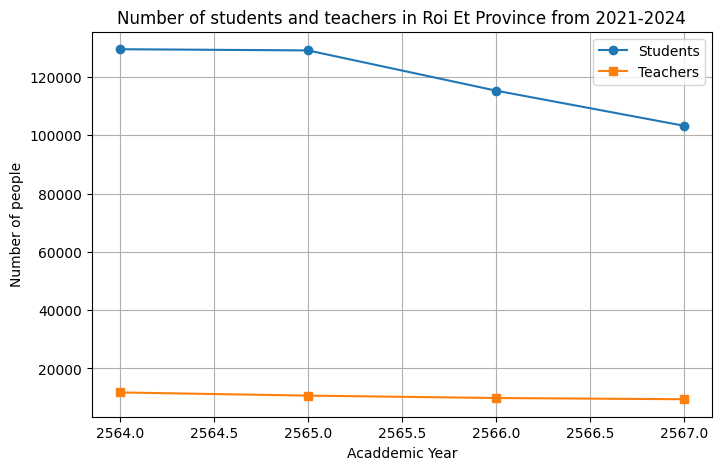

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(summary['YearEdu'], summary['Total_SumStu'], marker='o', label='Students')
plt.plot(summary['YearEdu'], summary['Total_SumTea'], marker='s', label='Teachers')

plt.title('Number of students and teachers in Roi Et Province from 2021-2024')
plt.xlabel('Acaddemic Year')
plt.ylabel('Number of people')
plt.legend()
plt.grid(True)
plt.show()

*From the chart, it is evident that the number of students in Roi Et province has **declined steadily** over the four-year period. Specifically, there were approximately **129,558 students in 2021 (B.E. 2564), 129,151 in 2022, 115,355 in 2023, and 103,307 in 2024.**
This represents a significant decrease of around 26,000 students compared to the pre-decline period in 2021. The most notable drop occurred in 2023—three years after the COVID-19 outbreak, suggesting a possible delayed impact of the pandemic on student enrollment and retention within the education system.*

*Meanwhile, the number of teachers also shows a **gradual downward trend**, though at a different rate compared to students. The total number of teachers decreased from **11,759 in 2021, 10,668 in 2022, 9,845 in 2023, to 9,430 in 2024.**
Interestingly, the reduction between 2021 and 2022 was more pronounced (around 1,000 teachers), whereas the decline in subsequent years became smaller—only about 400 teachers between 2023 and 2024.*

In [ ]:
!pip install folium
from folium import Map, plugins


center = [16.056, 103.652]
m = Map(location=center, zoom_start=9)

heat_data = df_all[['Latitude', 'Longitude']].dropna().values.tolist()

plugins.HeatMap(heat_data, radius=12, blur=15).add_to(m)

m

**Training a Linear Regression Model**

In [ ]:
last_year = summary['YearEdu'].max()
train = summary[summary['YearEdu'] < last_year]
test = summary[summary['YearEdu'] == last_year]


X_stu_train = train[['YearEdu']]
y_stu_train = train['Total_SumStu']
X_stu_test = test[['YearEdu']]
y_stu_test = test['Total_SumStu']


In [ ]:
from sklearn.linear_model import LinearRegression

model_stu = LinearRegression()
model_stu.fit(X_stu_train, y_stu_train)

a = model_stu.intercept_
b = model_stu.coef_[0]
print(f"สมการที่ได้: y = {a:.2f} + {b:.2f}x")

สมการที่ได้: y = 18340035.50 + -7101.50x


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model_stu.predict(X_stu_test)

mae = mean_absolute_error(y_stu_test, y_pred)
mse = mean_squared_error(y_stu_test, y_pred)
rmse = mse ** 0.5

print(f"ผลการทำนายปี {X_stu_test.values.flatten()[0]}:")
print(f"จริง = {y_stu_test.values[0]}, คาดการณ์ = {y_pred[0]:.0f}")
print(f"MAE = {mae:.2f}, RMSE = {rmse:.2f}")


ผลการทำนายปี 2567:
จริง = 103307.0, คาดการณ์ = 110485
MAE = 7178.00, RMSE = 7178.00


In [ ]:
future_years = np.array([2569, 2570, 2571]).reshape(-1, 1)
future_pred = model_stu.predict(future_years)

pred_df = pd.DataFrame({
    "year": future_years.flatten(),
    "predicted_students": future_pred.round(0).astype(int)
})

print(pred_df)

   year  predicted_students
0  2569               96282
1  2570               89180
2  2571               82079


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


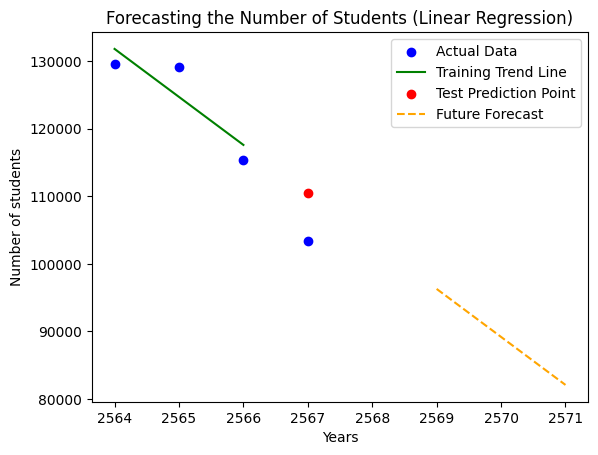

In [ ]:
plt.scatter(summary['YearEdu'], summary['Total_SumStu'], color="blue", label="Actual Data")
plt.plot(train['YearEdu'], model_stu.predict(X_stu_train), color="green", label="Training Trend Line")
plt.scatter(test['YearEdu'], y_pred, color="red", label="Test Prediction Point")
plt.plot(future_years, future_pred, color="orange", linestyle="--", label="Future Forecast")

plt.xlabel("Years")
plt.ylabel("Number of students")
plt.title("Forecasting the Number of Students (Linear Regression)")
plt.legend()
plt.show()



In [ ]:
X_tea_train = train[['YearEdu']]
y_tea_train = train['Total_SumTea']
X_tea_test = test[['YearEdu']]
y_tea_test = test['Total_SumTea']

In [ ]:
model_tea = LinearRegression()
model_tea.fit(X_tea_train, y_tea_train)

a = model_tea.intercept_
b = model_tea.coef_[0]
print(f"สมการที่ได้: y = {a:.2f} + {b:.2f}x")

สมการที่ได้: y = 2465462.33 + -957.00x


In [ ]:
y_pred = model_tea.predict(X_tea_test)

mae = mean_absolute_error(y_tea_test, y_pred)
mse = mean_squared_error(y_tea_test, y_pred)
rmse = mse ** 0.5

print(f"ผลการทำนายปี {X_tea_test.values.flatten()[0]}:")
print(f"จริง = {y_tea_test.values[0]}, คาดการณ์ = {y_pred[0]:.0f}")
print(f"MAE = {mae:.2f}, RMSE = {rmse:.2f}")

ผลการทำนายปี 2567:
จริง = 9430.0, คาดการณ์ = 8843
MAE = 586.67, RMSE = 586.67


In [ ]:
future_years = np.array([2569, 2570, 2571, 2572, 2573]).reshape(-1, 1)
future_pred = model_tea.predict(future_years)

pred_df = pd.DataFrame({
    "year": future_years.flatten(),
    "predicted_teachers": future_pred.round(0).astype(int)
})

print(pred_df)

   year  predicted_teachers
0  2569                6929
1  2570                5972
2  2571                5015
3  2572                4058
4  2573                3101


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


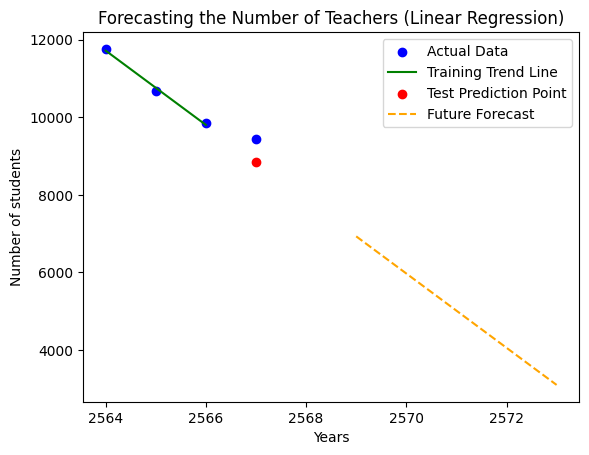

In [ ]:
plt.scatter(summary['YearEdu'], summary['Total_SumTea'], color="blue", label="Actual Data")
plt.plot(train['YearEdu'], model_tea.predict(X_tea_train), color="green", label="Training Trend Line")
plt.scatter(test['YearEdu'], y_pred, color="red", label="Test Prediction Point")
plt.plot(future_years, future_pred, color="orange", linestyle="--", label="Future Forecast")

plt.xlabel("Years")
plt.ylabel("Number of students")
plt.title("Forecasting the Number of Teachers (Linear Regression)")
plt.legend()
plt.show()


**Training a Exponential Smoothing model**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

summary = summary.sort_values("YearEdu")

model_stu = Holt(summary["Total_SumStu"], initialization_method="estimated")
fit_stu = model_stu.fit(smoothing_level=0.8, smoothing_slope=0.2)
forecast_stu = fit_stu.forecast(steps=3)  # พยากรณ์ 3 ปีข้างหน้า

model_tea = Holt(summary["Total_SumTea"], initialization_method="estimated")
fit_tea = model_tea.fit(smoothing_level=0.8, smoothing_slope=0.2)
forecast_tea = fit_tea.forecast(steps=3)

future_years = range(summary["YearEdu"].max() + 1, summary["YearEdu"].max() + 4)
forecast_df = pd.DataFrame({
    "YearEdu": future_years,
    "Forecast_Students": forecast_stu.round(0).astype(int),
    "Forecast_Teachers": forecast_tea.round(0).astype(int)
})

print(forecast_df)


   YearEdu  Forecast_Students  Forecast_Teachers
4     2568              94989               8579
5     2569              85787               7810
6     2570              76585               7041


/tmp/ipython-input-4141647924.py:15: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit_stu = model_stu.fit(smoothing_level=0.8, smoothing_slope=0.2)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/tmp/ipython-input-4141647924.py:22: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit_tea = model_tea.fit(smoothing_level=0.8, smoothing_slope=0.2)


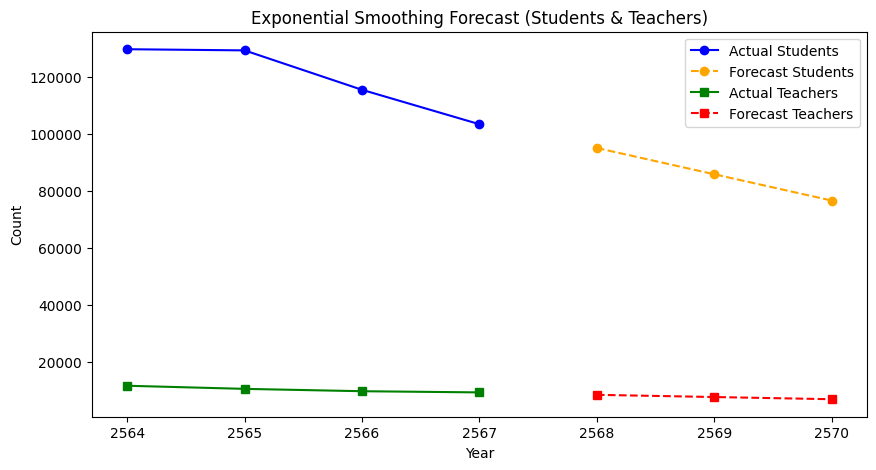

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(summary["YearEdu"], summary["Total_SumStu"], marker="o", label="Actual Students", color="blue")
plt.plot(forecast_df["YearEdu"], forecast_df["Forecast_Students"], marker="o", linestyle="--", color="orange", label="Forecast Students")

plt.plot(summary["YearEdu"], summary["Total_SumTea"], marker="s", label="Actual Teachers", color="green")
plt.plot(forecast_df["YearEdu"], forecast_df["Forecast_Teachers"], marker="s", linestyle="--", color="red", label="Forecast Teachers")

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Exponential Smoothing Forecast (Students & Teachers)")
plt.legend()
plt.show()


In [ ]:
summary.to_csv('total_stu_tea_summary.csv', index=False)

# Conclusion

Both the Linear Regression and Exponential Smoothing models suggest that the **number of students and teachers in Roi Et province** is likely to **continue declining** over the next three years.

However, it is important to note that the **dataset used in this study is relatively small and incomplete**, with a significant portion of missing (NaN) or null values. During the cleaning process, many of these entries had to be removed—resulting in nearly half of the original data being discarded. Consequently, **the resulting models may not provide highly accurate or reliable forecasts.**

*In other words*, this project should be viewed primarily as an exploratory analysis and modeling exercise, rather than a precise predictive system. The key objective was to practice data preprocessing, visualization, and basic forecasting techniques under real-world data limitations. Despite the dataset constraints, the project demonstrates a complete data science workflow—from data cleaning and integration to trend analysis and model interpretation.